**Name: Vanessa Giovani
NIM: 2301887566
Class: Machine Learning
Class Code: LB02**

1.

Import Package

In [90]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [91]:
!wget https://raw.githubusercontent.com/vanessagiovani/machinelearning/main/mydataset.csv

--2021-04-29 16:03:21--  https://raw.githubusercontent.com/vanessagiovani/machinelearning/main/mydataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1738173 (1.7M) [text/plain]
Saving to: ‘mydataset.csv.2’

mydataset.csv.2     100%[===================>]   1.66M  --.-KB/s    in 0.06s   

2021-04-29 16:03:22 (26.9 MB/s) - ‘mydataset.csv.2’ saved [1738173/1738173]



In [4]:
#load data
data = pd.read_csv("mydataset.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,36083287,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,NaN,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,36083512,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,NaN,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,36084566,东京精品民宿,161702799,Yang,NaN,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,36085357,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,NaN,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


In [7]:
#data profiling
print(data.info())
print(data.isna().values.any())

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11466 non-null  int64  
 1   name                 11466 non-null  object 
 2   host_id              11466 non-null  int64  
 3   host_name            11450 non-null  object 
 4   neighbourhood_group  0 non-null      float64
 5   neighbourhood        11466 non-null  object 
 6   latitude             11466 non-null  float64
 7   longitude            11466 non-null  float64
 8   room_type            11466 non-null  object 
 9   price                11466 non-null  int64  
 10  minimum_nights       11466 non-null  int64  
 11  number_of_reviews    11466 non-null  int64  
 12  last_review          9789 non-null   object 
 13  reviews_per_month    9789 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB
None
True


,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,1.146600e+04,1.146600e+04,0.0,11466.000000,11466.000000,1.146600e+04,11466.000000,11466.000000,9789.000000
mean,2.640545e+07,1.399776e+08,NaN,35.687159,139.734537,1.498470e+04,3.316239,26.028868,2.262540
std,7.565212e+06,8.064289e+07,NaN,0.217853,0.092771,3.327345e+04,7.766766,38.455449,1.744004
min,3.530300e+04,1.519770e+05,NaN,27.072330,139.130020,0.000000e+00,1.000000,0.000000,0.040000
25%,2.215251e+07,5.783171e+07,NaN,35.679620,139.698975,6.026000e+03,1.000000,2.000000,1.000000
50%,2.841873e+07,1.502326e+08,NaN,35.701910,139.729165,1.000700e+04,1.000000,12.000000,2.060000
75%,3.222416e+07,2.135896e+08,NaN,35.724215,139.784270,1.721600e+04,2.000000,32.000000,3.170000
max,3.608660e+07,2.714130e+08,NaN,35.832430,142.202880,1.000046e+06,180.000000,453.000000,51.210000


2.

In [ ]:
data.pop("neighbourhood_group")

In [20]:
for i in data:
  print(i, data[i].isna().values.any())
  #host_id, neighbourhood_group, reviews_per

id False
name False
host_id False
host_name False
neighbourhood False
latitude False
longitude False
room_type False
price False
minimum_nights False
number_of_reviews False
last_review False
reviews_per_month False


In [22]:
meanhost_id = data["host_id"].mean()
data["host_id"].fillna(meanhost_id)

0           151977
1           964081
2           341577
3          1573631
4           341577
           ...    
11461    235406925
11462    267481408
11463    161702799
11464    208189463
11465    254667806
Name: host_id, Length: 11466, dtype: int64

In [23]:
meanreviews_per_month = data["reviews_per_month"].mean()
data["reviews_per_month"].fillna(meanreviews_per_month)

0        0.20
1        1.65
2        1.25
3        1.55
4        1.24
         ... 
11461    0.00
11462    0.00
11463    0.00
11464    0.00
11465    0.00
Name: reviews_per_month, Length: 11466, dtype: float64

In [24]:
data

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,36083287,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,0,0.00
11462,36083512,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,0,0.00
11463,36084566,东京精品民宿,161702799,Yang,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,0,0.00
11464,36085357,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,0,0.00


Identify Discrete and Continuous Variables

In [28]:
print(data.info())
print(data.isna().values.any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 11466 non-null  int64  
 1   name               11466 non-null  object 
 2   host_id            11466 non-null  int64  
 3   host_name          11466 non-null  object 
 4   neighbourhood      11466 non-null  object 
 5   latitude           11466 non-null  float64
 6   longitude          11466 non-null  float64
 7   room_type          11466 non-null  object 
 8   price              11466 non-null  int64  
 9   minimum_nights     11466 non-null  int64  
 10  number_of_reviews  11466 non-null  int64  
 11  last_review        11466 non-null  object 
 12  reviews_per_month  11466 non-null  float64
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB
None
False


*Discrete Variables*

In [32]:
data['id'].unique()

array([   35303,   197677,   289597, ..., 36084566, 36085357, 36086604])

In [33]:
data['host_id'].unique()

array([   151977,    964081,    341577, ..., 267308886, 271413041,
        51517847])

In [34]:
data['price'].unique()

array([   4196,   10975,    6994,    3981,    6456,    9469,    5165,
          9684,    6564,    8500,    3551,   31958,   12374,    7747,
         13020,   27976,   30021,    3228,    2152,   12051,    6026,
          3336,   12912,   13450,    9146,   13988,    7962,    8608,
         14957,   69510,   79948,   16463,   27008,    1506,    9361,
          5488,   12805,   19045,   29052,    5380,   10007,   13127,
          5057,    4519,    5810,    4950,    3874,   47775,   30989,
          8070,   20552,   35078,    4842,   10437,   10760,   24963,
         40028,   17001,    3658,    6779,    3443,   21520,   22811,
          4089,   20444,   50035,    7532,    4412,   11836,   16033,
         23672,   12482,   20014,   26039,   34863,    5918,   33679,
          5272,    9039,    3013,    7317,    2367,   34970,    2905,
          2044,    6886,   19476,    2260,   15064,    4734,   17969,
          4304,   23027,   10653,   17647,   32280,   21951,    9792,
         16786,   18

In [35]:
data['minimum_nights'].unique()

array([ 28,   3,  30,  29,   1,   5,   2,   4,   7,  35,   6,  14,  31,
        10, 180, 120,  21,  20,  32,  50,   8,  15,  60,  90,  55,  23,
        24,  13, 179,  26])

In [36]:
data['number_of_reviews'].unique()

array([ 18, 156, 107,  99, 101, 215,  41,  90, 175,  85, 200, 233,  73,
        86, 127,  49, 306, 144, 197, 218, 213, 271, 147, 118, 151, 124,
         5,  71, 274,  22,   0,  17, 160,   7,  14,  70,  78, 140,  67,
       183,  27,  62,   6,   3, 103, 105,  50, 138, 109,  77, 296,  44,
       113,  89, 119,  55,  54, 141,  58,  76,  34,  42,  10,  25, 188,
       187,  63, 251, 167,  82, 110,  30,  53, 120,  39, 171, 417,  66,
       112, 293, 180,  21,  19,  11,  43,  32, 239, 208, 219,  28,  15,
        47,  37, 130, 223, 194, 177, 166, 106, 173, 255, 235, 134, 211,
       244, 212,  87,  38,   4,  69, 182,   2, 117,  75, 164,  97, 207,
        74,  26,  52, 121, 265,  94,  23,  12,  72, 181, 169,  13,   8,
         9, 178, 168, 172, 135, 128, 184, 259,  36,  46, 163, 123, 158,
        64,  60, 230, 203, 179,  84, 149, 243, 199,  35,  40, 206,  93,
       100, 115, 133,  24, 143,  29,  98, 191, 131, 246, 125, 136, 224,
       238, 228, 176, 262, 409, 198,  33,  56,  20, 222, 229, 20

*Continuous Variables*

In [38]:
data['latitude'].unique()

array([35.67152, 35.71721, 35.74267, ..., 35.74279, 35.70656, 35.69889])

In [39]:
data['longitude'].unique()

array([139.71203, 139.82596, 139.6581 , ..., 139.6898 , 139.78078,
       139.87236])

In [40]:
data['reviews_per_month'].unique()

array([2.000e-01, 1.650e+00, 1.250e+00, 1.550e+00, 1.240e+00, 2.680e+00,
       5.400e-01, 1.160e+00, 2.310e+00, 2.650e+00, 2.640e+00, 3.310e+00,
       1.020e+00, 1.220e+00, 1.750e+00, 2.400e+00, 6.900e-01, 4.190e+00,
       2.070e+00, 2.750e+00, 3.090e+00, 2.980e+00, 3.780e+00, 2.080e+00,
       1.680e+00, 2.140e+00, 1.770e+00, 6.000e-01, 4.300e-01, 1.110e+00,
       3.960e+00, 3.360e+00, 3.300e-01, 0.000e+00, 3.190e+00, 2.500e-01,
       1.570e+00, 2.380e+00, 3.250e+00, 1.300e-01, 2.700e-01, 2.290e+00,
       1.070e+00, 2.190e+00, 1.050e+00, 1.210e+00, 1.100e+00, 4.120e+00,
       4.700e-01, 1.280e+00, 1.200e-01, 3.510e+00, 3.800e-01, 6.000e-02,
       1.720e+00, 8.400e-01, 2.260e+00, 1.880e+00, 1.340e+00, 4.830e+00,
       9.600e-01, 1.900e+00, 1.470e+00, 1.990e+00, 1.150e+00, 9.300e-01,
       2.330e+00, 9.900e-01, 2.990e+00, 5.700e-01, 1.100e-01, 8.100e-01,
       1.800e-01, 3.290e+00, 1.330e+00, 4.290e+00, 2.880e+00, 2.100e+00,
       5.300e-01, 9.400e-01, 2.340e+00, 2.520e+00, 

*Plot Data*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


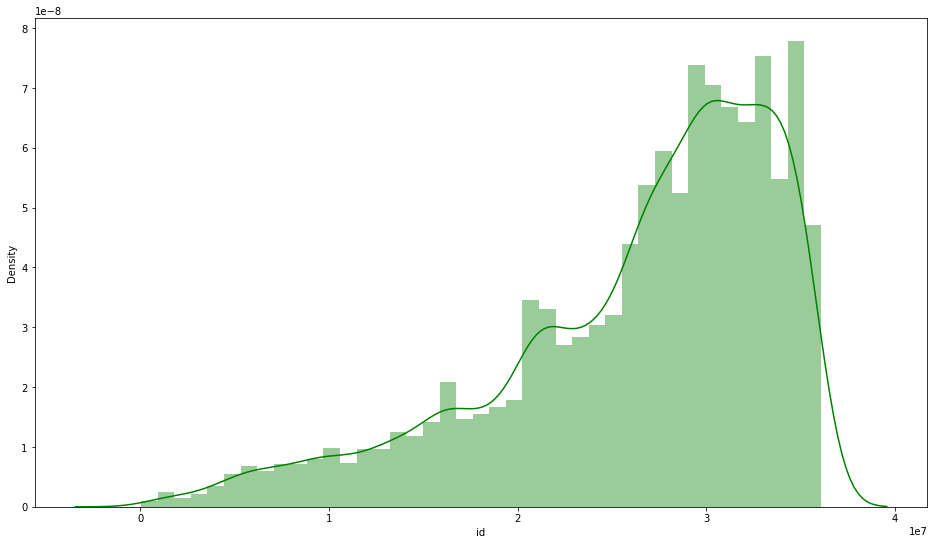

In [58]:
sb.distplot(data.id, color="green")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


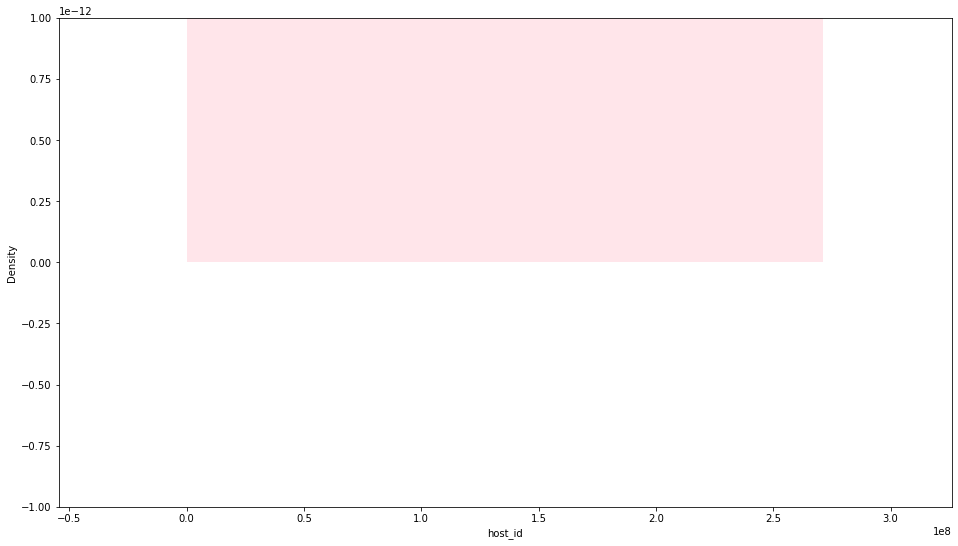

In [60]:
sb.distplot(data.host_id, color="pink")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


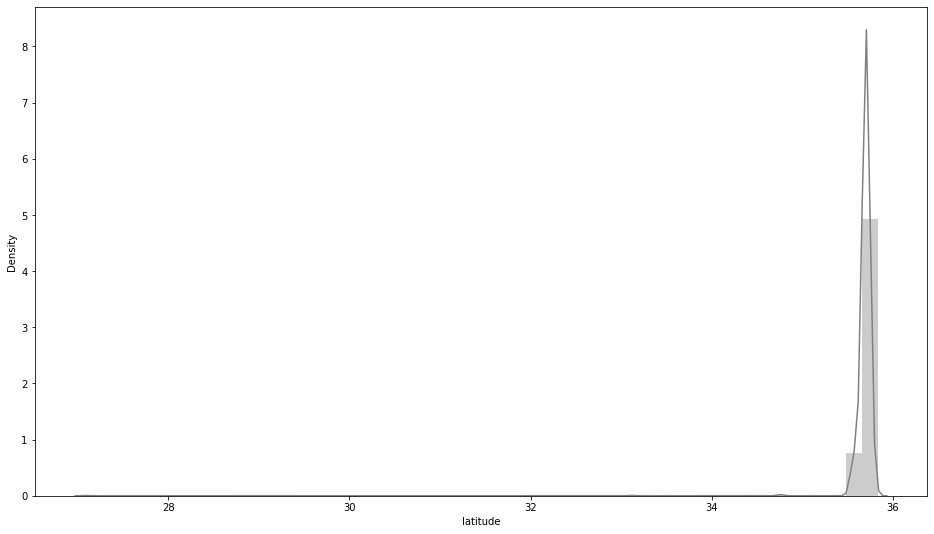

In [61]:
sb.distplot(data.latitude, color="grey")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


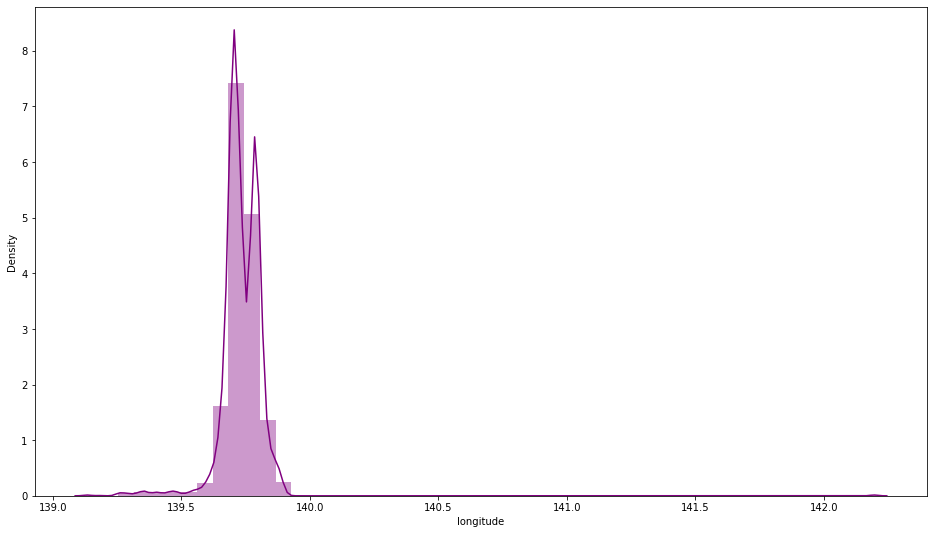

In [62]:
sb.distplot(data.longitude, color="purple")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


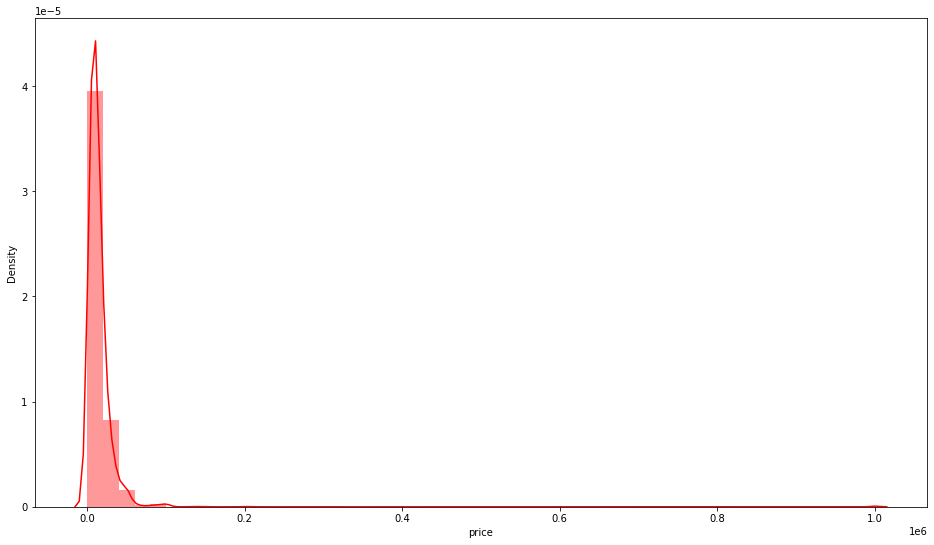

In [56]:
sb.distplot(data.price, color="red")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


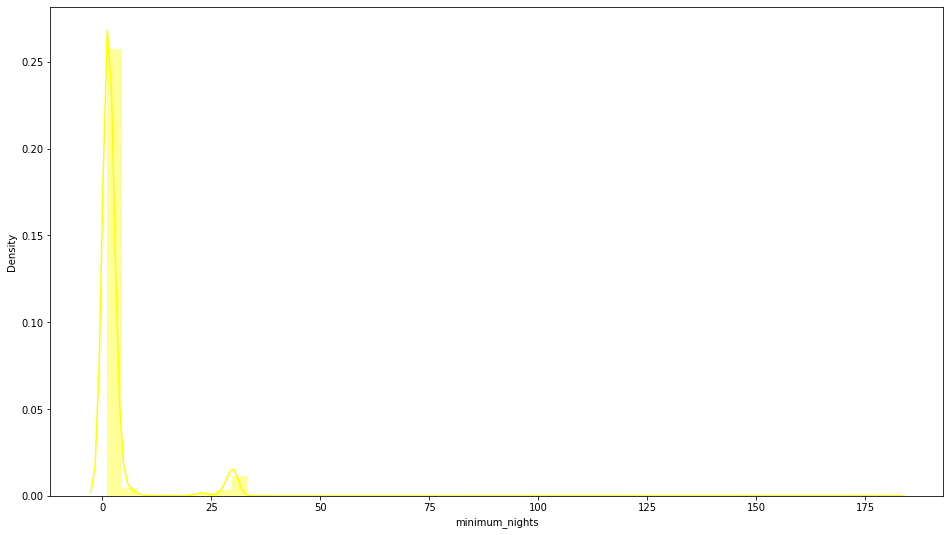

In [63]:
sb.distplot(data.minimum_nights, color ="yellow")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


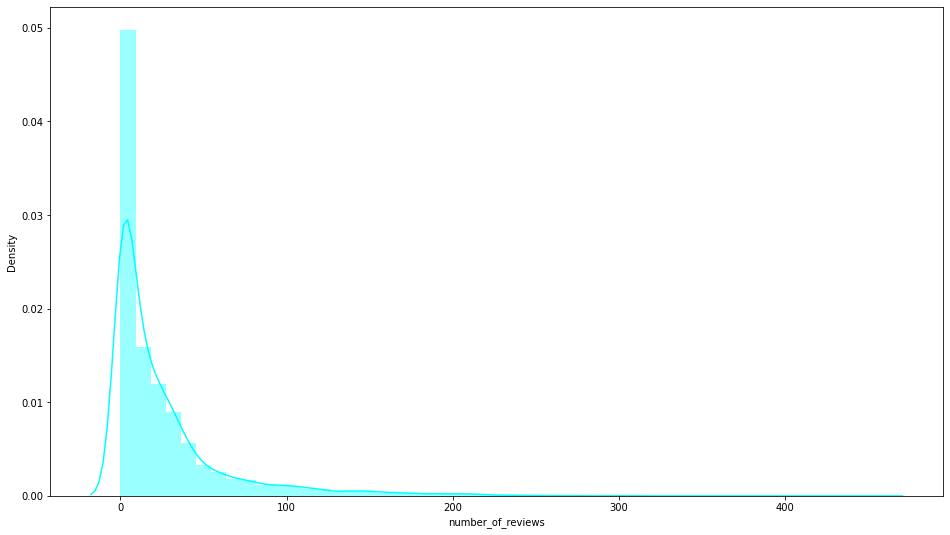

In [64]:
sb.distplot(data.number_of_reviews, color="cyan")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


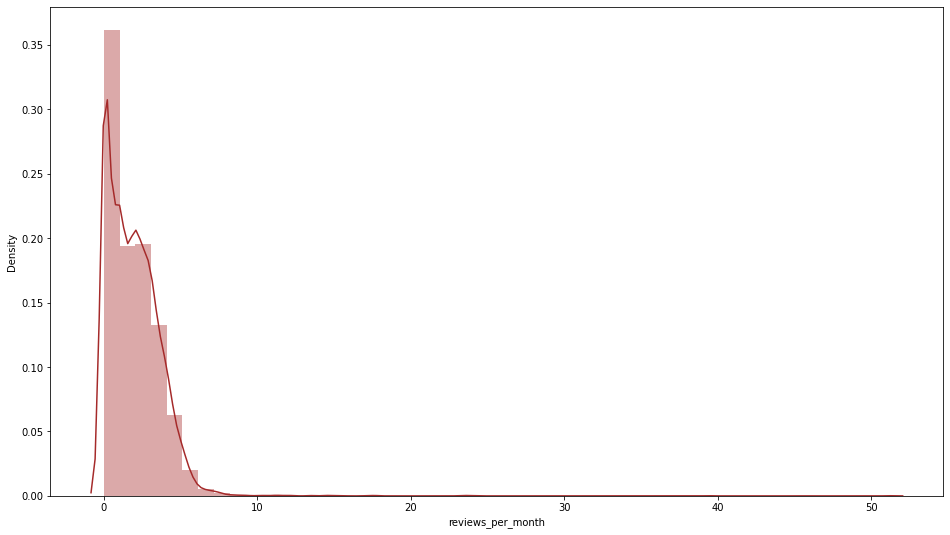

In [65]:
sb.distplot(data.reviews_per_month, color="brown")

3.

Explain data with correlation matrix

<bound method NDFrame.head of              id  ... reviews_per_month
0         35303  ...              0.20
1        197677  ...              1.65
2        289597  ...              1.25
3        370759  ...              1.55
4        700253  ...              1.24
...         ...  ...               ...
11461  36083287  ...              0.00
11462  36083512  ...              0.00
11463  36084566  ...              0.00
11464  36085357  ...              0.00
11465  36086604  ...              0.00

[11466 rows x 13 columns]>


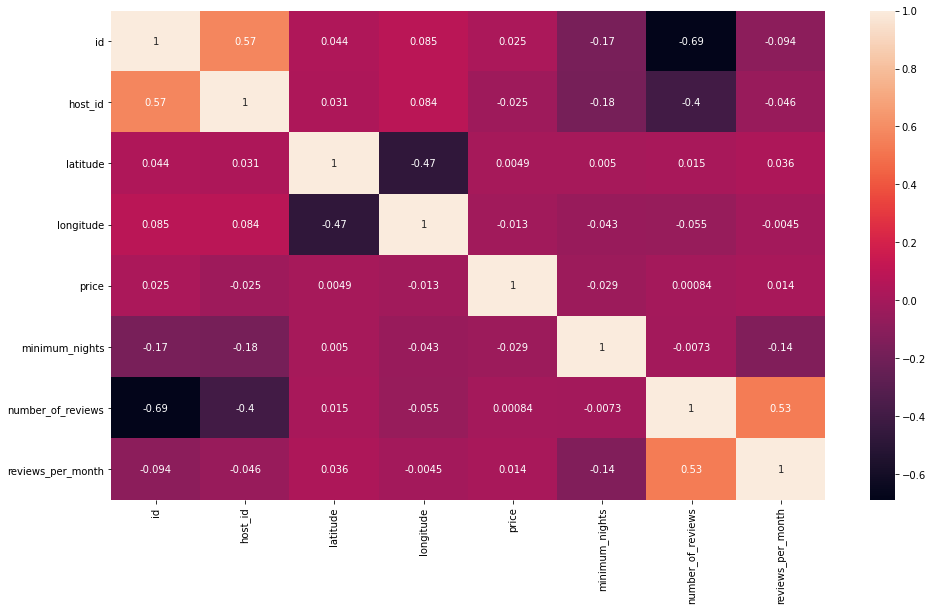

In [66]:
print(data.head)
corr_matrix = data.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.rcParams['figure.figsize'] = [25,16]
plt.show()

4.

*Univariate LR*

In [70]:
#prepare data
X = data[['minimum_nights']]
Y = data['reviews_per_month']
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2)

In [71]:
#train data
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)
print("theta 0  : ", LRM.intercept_)
print("theta 1  : ", LRM.coef_)
print("R2 Score : ", r2_score(YTest, prediction))
print("Error    : ", mean_squared_error(YTest, prediction))

theta 0  :  2.026577169509965
theta 1  :  [-0.03067469]
R2 Score :  0.023270497439233706
Error    :  3.474423037930676


*Multivariate LR*

In [76]:
#prepare data
X = data[['minimum_nights', 'number_of_reviews']]
Y = data['reviews_per_month']
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2)

In [102]:
#train data
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)
print("theta 0    : ", LRM.intercept_)
print("theta 1-2  : ", LRM.coef_)
print("R2 Score   : ", r2_score(YTest, prediction))
print("Error      : ", mean_squared_error(YTest, prediction))

theta 0    :  1.3854549428129865
theta 1-2  :  [-0.03168676  0.02525982]
R2 Score   :  0.3130483431771225
Error      :  1.8385894660277537


5.

In [103]:
#test evaluation
print("R2: ", r2_score(YTest,prediction))
print("MSE: ",mean_squared_error(YTest, prediction))
print("MAE: ", mean_absolute_error(YTest, prediction))

R2:  0.3130483431771225
MSE:  1.8385894660277537
MAE:  1.0381509148526036


6.

a.

In [95]:
#number_of_reviews
prediction = regression.predict(test[['reviews_per_month']])
print("R2: ", r2_score(test[['number_of_reviews']], prediction))

R2:  0.30006928722269766


In [96]:
#minimum_nights
prediction = regression.predict(test[['reviews_per_month']])
print("R2: ", r2_score(test[['minimum_nights']], prediction))

R2:  -17.283502336287


b.

In [97]:
#id
prediction = regression.predict(test[['reviews_per_month']])
print("R2: ", r2_score(test[['id']], prediction))

R2:  -12.516383770011242


In [98]:
#host_id
prediction = regression.predict(test[['reviews_per_month']])
print("R2: ", r2_score(test[['host_id']], prediction))

R2:  -3.0945237508213435


In [99]:
#latitude
prediction = regression.predict(test[['reviews_per_month']])
print("R2: ", r2_score(test[['latitude']], prediction))

R2:  -13625.58827671011


In [100]:
#longitude
prediction = regression.predict(test[['reviews_per_month']])
print("R2: ", r2_score(test[['longitude']], prediction))

R2:  -1706928.9209177403


In [101]:
#price
prediction = regression.predict(test[['reviews_per_month']])
print("R2: ", r2_score(test[['price']], prediction))

R2:  -0.25257504409745435
